## A3C and ACER

This notebook contains test runs of two RL Algorithms.

Asynchronous Advantage Actor Critic

Asynchronous means multiple agents are trained at the same time and submit asynchronous weight updates to a shared model.
The Gradients are derived from the Advantage Funktion (Q-V).
There is a policy and a critic network, the critic network rates the Value of the actions of the policy.

Actor Critic with Experience Replay uses the innovations of A3C.
Experience Replay increases the sample Efficiency, making it much faster on harder to simulate Environments like pong


In [ ]:
from baselines.common import plot_util as pu
import time
from baselines.run import run, play
import tensorflow as tf

### Default Parameters 
Default parameters used in the run function

In [2]:

dict(alg='acer', 
     env='CartPole-v0', 
     env_type=None, 
     gamestate=None,
     log_path='./logs/acer/',
     network=None, 
     num_env=None, 
     num_timesteps=30000.0, 
     play=False, 
     reward_scale=1.0,
     save_path='./models/model', 
     save_video_interval=0, 
     save_video_length=200, 
     seed=0,
     trust_region=True, 
     load_path=None, 
     nsteps=128,
     replay_ratio=4)


{'alg': 'acer',
 'env': 'CartPole-v0',
 'env_type': None,
 'gamestate': None,
 'log_path': './logs/acer/',
 'network': None,
 'num_env': None,
 'num_timesteps': 30000.0,
 'play': False,
 'reward_scale': 1.0,
 'save_path': './models/model',
 'save_video_interval': 0,
 'save_video_length': 200,
 'seed': 0,
 'trust_region': True,
 'load_path': None,
 'nsteps': 128,
 'replay_ratio': 4}

## Implementation Details

The Acer implementation can be found in the a3cacerdemo/baselines/acer/acer.py file


In [3]:
log_path="./logs/cartpole/"
for seed in range(0,6):
    run(seed=seed, trust_region=True, log_path=f"{log_path}cartpole-{str(seed)}/")

Logging to ./logs/cartpole/cartpole-0/
env_type: classic_control
Training acer on classic_control:CartPole-v0 with arguments 
{'trust_region': True, 'load_path': None, 'nsteps': 128, 'replay_ratio': 4, 'network': 'mlp'}
Running Acer Simple
{'network': 'mlp', 'env': <baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f36873f38d0>, 'seed': 0, 'nsteps': 128, 'total_timesteps': 30000, 'q_coef': 0.5, 'ent_coef': 0.01, 'max_grad_norm': 10, 'lr': 0.0007, 'lrschedule': 'linear', 'rprop_epsilon': 1e-05, 'rprop_alpha': 0.99, 'gamma': 0.99, 'log_interval': 100, 'buffer_size': 50000, 'replay_ratio': 4, 'replay_start': 10000, 'c': 10.0, 'trust_region': True, 'alpha': 0.99, 'delta': 1, 'load_path': None, 'network_kwargs': {}}
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Colocations handled automatically by placer.


/home/simon/miniconda3/envs/ml-ops/lib/python3.7/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Params 8
<tf.Variable 'acer_model/pi/mlp_fc0/w:0' shape=(4, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc0/b:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc1/w:0' shape=(64, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc1/b:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'acer_model/pi/w:0' shape=(64, 2) dtype=float32_ref>
<tf.Variable 'acer_model/pi/b:0' shape=(2,) dtype=float32_ref>
<tf.Variable 'acer_model/q/w:0' shape=(64, 2) dtype=float32_ref>
<tf.Variable 'acer_model/q/b:0' shape=(2,) dtype=float32_ref>
acer_model/pi/mlp_fc0/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc0/b/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/w/ExponentialMovingAverage:0
acer_model/pi/mlp_fc1/b/ExponentialMovingAverage:0
acer_model/pi/w/ExponentialMovingAverage:0
acer_model/pi/b/ExponentialMovingAverage:0
acer_model/q/w/ExponentialMovingAverage:0
acer_model/q/b/ExponentialMovingAverage:0
Instructions for updating:
Use tf.cast instead.
[<tf.Tensor 'gradien

----------------------------------
| avg_norm_adj        | 0        |
| avg_norm_g          | 18.7     |
| avg_norm_grads_f    | 18.7     |
| avg_norm_k          | 1.43     |
| avg_norm_k_dot_g    | 18.7     |
| entropy             | 0.682    |
| explained_variance  | -0.00842 |
| fps                 | 986      |
| loss                | 39.5     |
| loss_bc             | -0       |
| loss_f              | 6.38     |
| loss_policy         | 6.38     |
| loss_q              | 66.2     |
| mean_episode_length | 23.4     |
| mean_episode_reward | 23.4     |
| norm_grads          | 9.8      |
| norm_grads_policy   | 1.69     |
| norm_grads_q        | 9.67     |
| total_timesteps     | 1.28e+04 |
----------------------------------
----------------------------------
| avg_norm_adj        | 0.488    |
| avg_norm_g          | 32.1     |
| avg_norm_grads_f    | 31.8     |
| avg_norm_k          | 1.42     |
| avg_norm_k_dot_g    | 32.2     |
| entropy             | 0.65     |
| explained_variance

[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_1:0' shape=(4, 64) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc0/MatMul_grad/MatMul_1:0' shape=(4, 64) dtype=float32>, 'acer_model/pi/mlp_fc0/w:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc0/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc0/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, 'acer_model/pi/mlp_fc0/b:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc1/MatMul_grad/MatMul_1:0' shape=(64, 64) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc1/MatMul_grad/MatMul_1:0' shape=(64, 64) dtype=float32>, 'acer_model/pi/mlp_fc1/w:0']
[<tf.Tensor 'gradients_1/acer_model/pi_2/mlp_fc1/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, <tf.Tensor 'gradients_2/acer_model/pi_2/mlp_fc1/add_grad/Reshape_1:0' shape=(64,) dtype=float32>, 'acer_model/pi/mlp_fc1/b:0']
[<tf.Tensor 'gradients_1/acer_model/pi_3/MatMul_grad/MatMul_1:0' shape=(64, 2)

Logging to ./logs/cartpole/cartpole-5/
env_type: classic_control
Training acer on classic_control:CartPole-v0 with arguments 
{'trust_region': True, 'load_path': None, 'nsteps': 128, 'replay_ratio': 4, 'network': 'mlp'}
Running Acer Simple
{'network': 'mlp', 'env': <baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f35c1ce9be0>, 'seed': 5, 'nsteps': 128, 'total_timesteps': 30000, 'q_coef': 0.5, 'ent_coef': 0.01, 'max_grad_norm': 10, 'lr': 0.0007, 'lrschedule': 'linear', 'rprop_epsilon': 1e-05, 'rprop_alpha': 0.99, 'gamma': 0.99, 'log_interval': 100, 'buffer_size': 50000, 'replay_ratio': 4, 'replay_start': 10000, 'c': 10.0, 'trust_region': True, 'alpha': 0.99, 'delta': 1, 'load_path': None, 'network_kwargs': {}}
Params 8
<tf.Variable 'acer_model/pi/mlp_fc0/w:0' shape=(4, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc0/b:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc1/w:0' shape=(64, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc1

/home/simon/src/github.com/dalasnoin/a3cacerdemo/baselines/bench/monitor.py:162: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


(<Figure size 432x432 with 1 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35842d63c8>]],
       dtype=object))

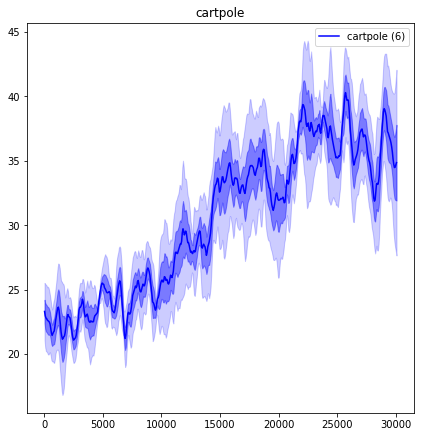

In [4]:
results = pu.load_results(log_path)
pu.plot_results(results, average_group=True)


In the following the Trust Regions have been turned off. 

In [5]:
log_path="./logs/cartpole-notrust/"
for seed in range(0,3):
    run(seed=seed,trust_region=False, log_path=f"{log_path}cartpole-notrust-{str(seed)}/")

Logging to ./logs/cartpole-notrust/cartpole-notrust-0/
env_type: classic_control
Training acer on classic_control:CartPole-v0 with arguments 
{'trust_region': False, 'load_path': None, 'nsteps': 128, 'replay_ratio': 4, 'network': 'mlp'}
Running Acer Simple
{'network': 'mlp', 'env': <baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f3614759f28>, 'seed': 0, 'nsteps': 128, 'total_timesteps': 30000, 'q_coef': 0.5, 'ent_coef': 0.01, 'max_grad_norm': 10, 'lr': 0.0007, 'lrschedule': 'linear', 'rprop_epsilon': 1e-05, 'rprop_alpha': 0.99, 'gamma': 0.99, 'log_interval': 100, 'buffer_size': 50000, 'replay_ratio': 4, 'replay_start': 10000, 'c': 10.0, 'trust_region': False, 'alpha': 0.99, 'delta': 1, 'load_path': None, 'network_kwargs': {}}
Params 8
<tf.Variable 'acer_model/pi/mlp_fc0/w:0' shape=(4, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc0/b:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc1/w:0' shape=(64, 64) dtype=float32_ref>
<tf.Variable 'ace

----------------------------------
| entropy             | 0.681    |
| explained_variance  | 0.0303   |
| fps                 | 1.65e+03 |
| loss                | 33.2     |
| loss_bc             | -0       |
| loss_f              | 6        |
| loss_policy         | 6        |
| loss_q              | 54.5     |
| mean_episode_length | 25       |
| mean_episode_reward | 25       |
| norm_grads          | 8.35     |
| total_timesteps     | 1.28e+04 |
----------------------------------
----------------------------------
| entropy             | 0.651    |
| explained_variance  | 0.0397   |
| fps                 | 1.48e+03 |
| loss                | 27.3     |
| loss_bc             | -0       |
| loss_f              | 4.13     |
| loss_policy         | 4.13     |
| loss_q              | 46.3     |
| mean_episode_length | 40.8     |
| mean_episode_reward | 40.8     |
| norm_grads          | 15.7     |
| total_timesteps     | 2.56e+04 |
----------------------------------


(<Figure size 432x432 with 1 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3587da86d8>]],
       dtype=object))

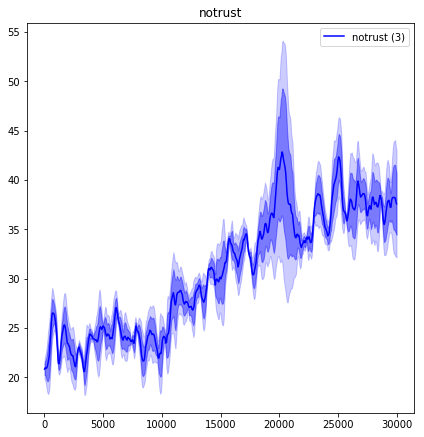

In [6]:
results = pu.load_results(log_path)

pu.plot_results(results, average_group=True)

### A3C

A3C can be seen as a special case of Acer with replay_ratio = 0 and no trust regions.
It is an on-policy method

In [ ]:
log_path="./logs/cartpole-notrust-a3c/"
for seed in range(0,3):
    run(seed=seed,replay_ratio=0,trust_region=False, log_path=f"{log_path}cartpole-notrust-a3c-{str(seed)}/")

In [ ]:
results = pu.load_results(log_path)

pu.plot_results(results, average_group=True)

In [ ]:
env="MountainCar-v0"
log_path=f"./logs/{env}/"

for seed in range(0,3):
    run(seed=seed, log_path=f"{log_path}{env}-{str(seed)}/", num_timesteps=3e5)

In [ ]:
results = pu.load_results(log_path)

pu.plot_results(results, average_group=True)

### Play 

In [7]:
env="MountainCar-v0"
play(load_path="./models/model", env=env)

Logging to ./logs/acer/
env_type: classic_control
Training acer on classic_control:MountainCar-v0 with arguments 
{'trust_region': True, 'load_path': './models/model', 'nsteps': 128, 'replay_ratio': 4, 'network': 'mlp'}
Running Acer Simple
{'network': 'mlp', 'env': <baselines.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f358420af28>, 'seed': 0, 'nsteps': 128, 'total_timesteps': 0, 'q_coef': 0.5, 'ent_coef': 0.01, 'max_grad_norm': 10, 'lr': 0.0007, 'lrschedule': 'linear', 'rprop_epsilon': 1e-05, 'rprop_alpha': 0.99, 'gamma': 0.99, 'log_interval': 100, 'buffer_size': 50000, 'replay_ratio': 4, 'replay_start': 10000, 'c': 10.0, 'trust_region': True, 'alpha': 0.99, 'delta': 1, 'load_path': './models/model', 'network_kwargs': {}}
Params 8
<tf.Variable 'acer_model/pi/mlp_fc0/w:0' shape=(2, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc0/b:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'acer_model/pi/mlp_fc1/w:0' shape=(64, 64) dtype=float32_ref>
<tf.Variable 'acer_model/pi

ValueError: Dimension 0 in both shapes must be equal, but are 2 and 4. Shapes are [2,64] and [4,64]. for 'Assign' (op: 'Assign') with input shapes: [2,64], [4,64].

In [ ]:
env="PongNoFrameskip-v4"
play(load_path="./models/pong3m", env=env)